In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

## Data Wrangling

In [11]:
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import cv2

In [12]:
base_dir = '/Users/sabitabaral/Documents/Springboard/capstone3/Data'
target_width, target_height = 100, 100
batch_size = 10
for data_type in os.listdir(base_dir):
    data_type_path = os.path.join(base_dir, data_type)
    
    # Ensure it's a directory (not a system file)
    if os.path.isdir(data_type_path) and not data_type.startswith('.'):
        # Loop through each class in the data type
        for class_name in os.listdir(data_type_path):
            class_path = os.path.join(data_type_path, class_name)
            
            # Ensure it's a directory (not a system file)
            if os.path.isdir(class_path) and not class_name.startswith('.'):
                # Loop through each file in the class
                for filename in os.listdir(class_path):
                    filepath = os.path.join(class_path, filename)

                    # Check if it's a file (not a subdirectory)
                    if os.path.isfile(filepath):
                        # Read the image
                        img = cv2.imread(filepath)

                        # Resize the image
                        img_resized = cv2.resize(img, (target_width, target_height))
                        # Save or overwrite the resized image
                        cv2.imwrite(filepath, img_resized)

In [13]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create generators for training, validation, and test sets
train_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='categorical',  # Since you have multiple classes
    subset='training'  # Specify 'training' for the training set
)

Found 491 images belonging to 4 classes.


In [14]:
validation_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'valid'),
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' for the validation set
)

test_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(target_width, target_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for test set
)

Found 13 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


## Exploratory Data Analysis

In [15]:
from PIL import Image
import random

In [22]:
train_data_path = '/Users/sabitabaral/Documents/Springboard/capstone3/Data/train'
train_classes = ["adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib", "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa", "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa", "normal"]

In [25]:
def display_random_images(data_path, train_classes, num_images=3):
    for class_name in train_classes:
        class_path = os.path.join(data_path, class_name)
        image_files = os.listdir(class_path)
        random_images = random.sample(image_files, num_images)

        plt.figure(figsize=(10, 4))
        for i, image_file in enumerate(random_images, 1):
            image_path = os.path.join(class_path, image_file)
            img = Image.open(image_path)
            
            plt.subplot(1, num_images, i)
            plt.imshow(img)
            plt.title(f'{class_name} - {i}')
            plt.axis('off')
        plt.show()

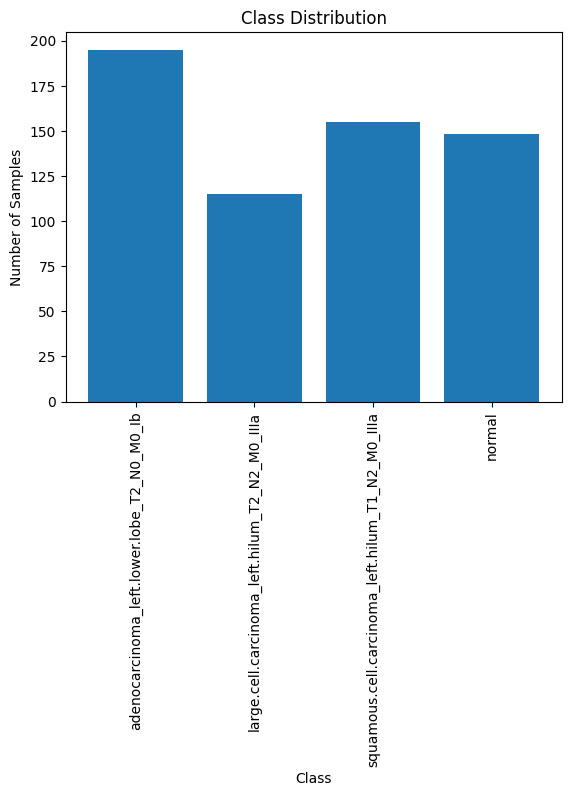

In [24]:
## see class distribution
class_counts = {class_name: len(os.listdir(os.path.join(train_data_path, class_name))) for class_name in train_classes}
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()

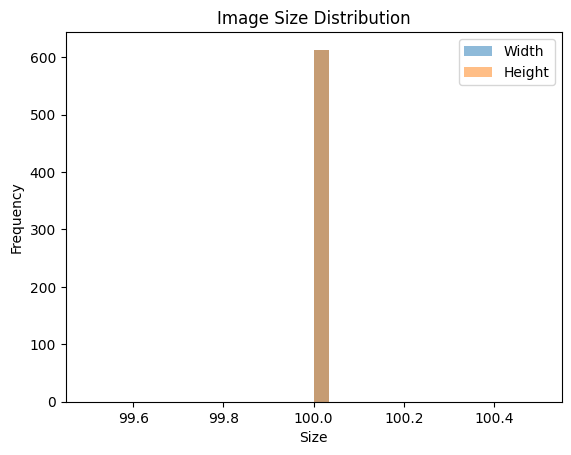

In [29]:
## Image size distribution
def get_image_sizes(data_path, train_classes):
    sizes = []
    for class_name in train_classes:
        class_path = os.path.join(data_path, class_name)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            img = Image.open(image_path)
            sizes.append(img.size)
    return sizes

# Get image sizes
image_sizes = get_image_sizes(train_data_path, train_classes)

# Plot histograms of image sizes
widths, heights = zip(*image_sizes)
plt.hist(widths, bins=30, alpha=0.5, label='Width')
plt.hist(heights, bins=30, alpha=0.5, label='Height')
plt.legend()
plt.title('Image Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

#### All images has same size, which is good

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 8, 3, 0, 0, 1, 5, 15, 11, 2, 3, 8, 12, 11, 8, 5, 12, 20, 32, 39, 41, 34, 23, 9, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 33, 70, 66, 64, 62, 63, 64, 63, 64, 64, 63, 63, 64, 64, 63, 63, 64, 65, 69, 72, 34, 7, 9, 4, 11, 11, 0, 0, 0, 2, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 13, 9, 0, 1, 0, 8, 15, 7, 5, 3, 8, 10, 10, 21, 43, 62, 72, 74, 72, 71, 68, 69, 70, 71, 72, 65, 43, 20, 5, 2, 0, 0, 2, 15, 59, 73, 63, 64, 63, 63, 63, 63, 65, 63, 64, 63, 64, 63, 63, 63, 65, 63, 64, 63, 64, 71, 59, 12, 11, 1, 7, 10, 10, 1, 0, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 12, 4, 0, 0, 7, 13, 5, 3, 8, 12, 9, 14, 53, 74, 72, 66, 64, 64, 65, 64, 62, 63, 63, 61, 62, 63, 63, 68, 74, 72, 59, 46, 44, 61, 76, 66, 64, 65, 64, 65, 64, 62, 66, 64, 63, 63, 64, 62, 63, 63, 62, 63, 63, 65, 63, 62, 64, 65, 77, 24, 9, 8, 4, 4, 13, 0, 0, 4, 4, 0, 0,

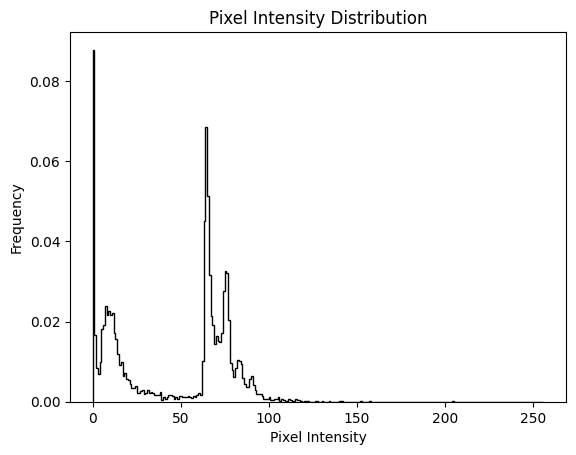

In [30]:
## pixel indensity distribution
from PIL import Image
def get_pixel_intensities(image):
    # Convert the image to grayscale if it's in color
    if image.mode != 'L':
        image = image.convert('L')

    # Get pixel intensities
    intensities = list(image.getdata())
    
    return intensities

# Example usage:
class_path = os.path.join(train_data_path, class_name)
image_file = random.choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_file)
img = Image.open(image_path)

pixel_intensities = get_pixel_intensities(img)
print(pixel_intensities)

# Plot histogram of pixel intensities
plt.hist(pixel_intensities, bins=256, range=(0, 256), density=True, histtype='step', color='black')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [31]:
print(img.mode)

RGB


In [32]:
img.split()

(<PIL.Image.Image image mode=L size=100x100>,
 <PIL.Image.Image image mode=L size=100x100>,
 <PIL.Image.Image image mode=L size=100x100>)

### Looks like images are grayscale

# Modeling

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [34]:
train_data_path = '/Users/sabitabaral/Documents/Springboard/capstone3/Data/train'
test_data_path = '/Users/sabitabaral/Documents/Springboard/capstone3/Data/test'
valid_data_path = '/Users/sabitabaral/Documents/Springboard/capstone3/Data/valid'
train_classes = ["adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib", "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa", "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa", "normal"]
valid_classes = ["adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib", "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa", "squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa", "normal"]
test_classes = ["adenocarcinoma", "large.cell.carcinoma", "squamous.cell.carcinoma", "normal"]

In [36]:
batch_size = 32
img_width, img_height = 100, 100

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have multiple classes
    shuffle=True,
    classes=train_classes,
    seed=42)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=valid_classes,
    shuffle=False)

test_generator = valid_test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=test_classes,
    shuffle=False)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Use train_generator.num_classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Epoch 1/10
19/19 [==============================] - 5s 192ms/step - loss: 1.3180 - accuracy: 0.3098 - val_loss: 1.4364 - val_accuracy: 0.3438
Epoch 2/10
19/19 [==============================] - 4s 204ms/step - loss: 1.1764 - accuracy: 0.4819 - val_loss: 1.2321 - val_accuracy: 0.4062
Epoch 3/10
19/19 [==============================] - 5s 254ms/step - loss: 1.0502 - accuracy: 0.5594 - val_loss: 1.0888 - val_accuracy: 0.5312
Epoch 4/10
19/19 [==============================] - 4s 227ms/step - loss: 1.0417 - accuracy: 0.5456 - val_loss: 1.1744 - val_accuracy: 0.5000
Epoch 5/10
19/19 [==============================] - 4s 229ms/step - loss: 1.0067 - accuracy: 0.6162 - val_loss: 1.1360 - val_accuracy: 0.4531
Epoch 6/10
19/19 [==============================] - 5s 235ms/step - loss: 0.9047 - accuracy: 0.6196 - val_loss: 0.9573 - val_accuracy: 0.5625
Epoch 7/10
19/19 [========

The test accuracy is so low. Let's now use Resnet

In [49]:
from sklearn.utils.class_weight import compute_class_weight

# Get class labels and indices
class_labels = np.unique(train_generator.classes)

# Compute class weights manually
class_weights = len(train_generator.classes) / (len(class_labels) * np.bincount(train_generator.classes))

class_weight_dict = dict(zip(class_labels, class_weights))

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Assuming img_width, img_height = 100, 100
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False  # Freeze the weights of the pre-trained layers

model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    class_weight=class_weight_dict
)

Epoch 1/10
19/19 [==============================] - 13s 548ms/step - loss: 1.4826 - accuracy: 0.3253 - val_loss: 1.2546 - val_accuracy: 0.3438
Epoch 2/10
19/19 [==============================] - 10s 546ms/step - loss: 1.1126 - accuracy: 0.4699 - val_loss: 1.2533 - val_accuracy: 0.3594
Epoch 3/10
19/19 [==============================] - 11s 600ms/step - loss: 1.0612 - accuracy: 0.4785 - val_loss: 1.2305 - val_accuracy: 0.3906
Epoch 4/10
19/19 [==============================] - 13s 679ms/step - loss: 1.0945 - accuracy: 0.4492 - val_loss: 1.2803 - val_accuracy: 0.2969
Epoch 5/10
19/19 [==============================] - 13s 687ms/step - loss: 1.0242 - accuracy: 0.5026 - val_loss: 1.2598 - val_accuracy: 0.3594
Epoch 6/10
19/19 [==============================] - 12s 589ms/step - loss: 1.0209 - accuracy: 0.4871 - val_loss: 1.2821 - val_accuracy: 0.3906
Epoch 7/10
19/19 [==============================] - 11s 560ms/step - loss: 1.0190 - accuracy: 0.4940 - val_loss: 1.2643 - val_accuracy: 0.3594

More tuning for CNN; using batch normalization,learning rate scheduler and early stopping

In [53]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras import regularizers
batch_size = 32
img_width, img_height = 100, 100


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming you have multiple classes
    shuffle=True,
    classes=train_classes,
    seed=42)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=valid_classes,
    shuffle=False)

test_generator = valid_test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    classes=test_classes,
    shuffle=False)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Use train_generator.num_classes


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 10))

lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Add lr_scheduler and early_stopping to model.fit callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[lr_scheduler, early_stopping]
)
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Epoch 1/10
19/19 [==============================] - 6s 245ms/step - loss: 6.7575 - accuracy: 0.4905 - val_loss: 4.9315 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - 4s 229ms/step - loss: 5.1467 - accuracy: 0.5456 - val_loss: 11.1702 - val_accuracy: 0.2344 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - 5s 248ms/step - loss: 3.8053 - accuracy: 0.5164 - val_loss: 9.2824 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 4/10
19/19 [==============================] - 5s 240ms/step - loss: 3.4181 - accuracy: 0.5525 - val_loss: 8.9793 - val_accuracy: 0.2344 - lr: 0.0010
Epoch 5/10
19/19 [==============================] - 5s 241ms/step - loss: 3.2289 - accuracy: 0.5886 - val_loss: 7.9982 - val_accuracy: 0.3281 - lr: 0.0010
Epoch 6/10
10/10 [==============================] - 1s 94ms/step - loss: 4.4438 - accuracy: 0.4254
Tes

It's great that we increased test accuracy of CNN network form 39% to 43% after some tunings like using batch normalization,learning rate scheduler and early stopping. 

Let's use other metrics

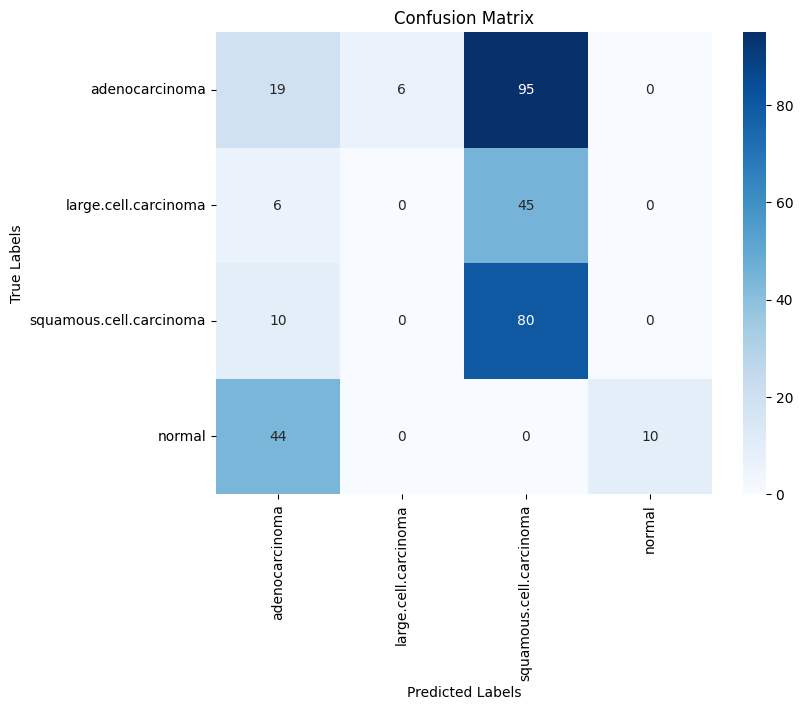

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [63]:
##
from sklearn.metrics import classification_report

predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true class labels
true_classes = test_generator.classes

# Generate classification report
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

10/10 [==============================] - 1s 87ms/step
                         precision    recall  f1-score   support

         adenocarcinoma       0.24      0.16      0.19       120
   large.cell.carcinoma       0.00      0.00      0.00        51
squamous.cell.carcinoma       0.36      0.89      0.52        90
                 normal       1.00      0.19      0.31        54

               accuracy                           0.35       315
              macro avg       0.40      0.31      0.25       315
           weighted avg       0.37      0.35      0.27       315



Looking at F1 score, significant challenges correctly identifying class large.cell.carcinoma. 
squamous.cell.carcinoma class has a good balence between precision and recall.